# Gabor Filter

For image processing and computer vision, Gabor filters are generally used in texture analysis, edge detection, feature extraction, etc. 

It is a useful filter especially when we are looking at the features that are oriented in a specific direction for example, lets say we are working on images of sedimentary rock and we all know that in a sedimentray rock, the bedding layers are all horizontal. So how do you separate these horizontal layers ? 

As an answer to this question, we can apply Gabor Filter with an orientation of 0 degree.

Similarly we can do it for vertical features or at any angle. Thus Gabor filter is multiple filters in one.

Gabor filters are band pass filters; meaning they allow certain band  of frequencies and reject other types.

### Parameters of Gabor Filter:

- `ksize` Size of the filter returned.
- `sigma` Standard deviation of the gaussian envelope.
- `theta` Orientation of the normal to the parallel stripes of a Gabor function.
- `lambda` Wavelength of the sinusoidal factor.
- `gamma` Spatial aspect ratio.
- `psi` Phase offset.
- `ktype` Type of filter coefficients. It can be CV_32F or CV_64F. It indicates the type and range of values that each pixel in the Gabor kernel can hold. Basically float32 or float64

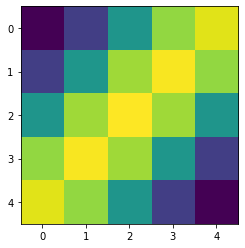

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

ksize = 5  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)

sigma = 3 #Large sigma on small features will fully miss the features. 

theta = 1*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions

lamda = 1*np.pi /4  #1/4 works best for angled. 

gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.

phi = 0  #Phase offset. I leave it to 0. 


kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

We have plotted the kernel in above cell. If we look at the plot you can observe that since `theta = 1*np.pi/4 ` the kernel is actually rotated by 45 degrees.

Let try a bigger kernel size, say `kszie=50`

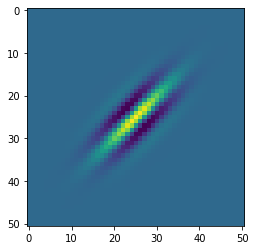

In [3]:
ksize = 50  
sigma = 3 
theta = 1*np.pi/4  
lamda = 1*np.pi /4  
gamma=0.4  
phi = 0  

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

Let change the value of sigma now, say `sigma=30`

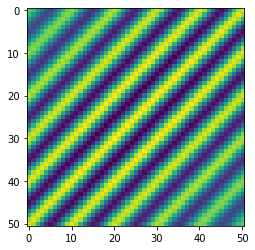

In [4]:
ksize = 50  
sigma = 30 
theta = 1*np.pi/4  
lamda = 1*np.pi /4  
gamma=0.4  
phi = 0  

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

Now let's change np.pi/2 instead of pi/4.

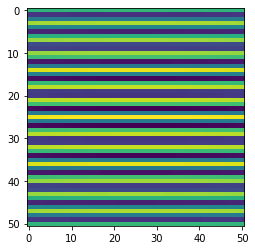

In [5]:
ksize = 50  
sigma = 30 
theta = 1*np.pi/2  
lamda = 1*np.pi /4  
gamma=0.4  
phi = 0  

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

so now it's horizontal as you can see. 

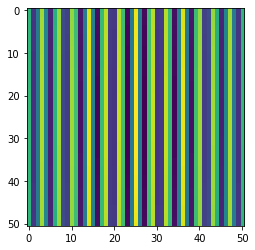

In [6]:
ksize = 50  
sigma = 30 
theta = 1*np.pi 
lamda = 1*np.pi /4  
gamma=0.4  
phi = 0  

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

If we just do `np.pi` which is nothing but just pi right now it's all vertical. 

so if you are looking for features that are horizontal then by applying this horizontal filter you're actually passing these horizontal features through and then blocking everything that's vertical exactly vice versa.

now let's change `lamda` which is nothing but our wavelength or frequency and let's see how the wavelength affects 

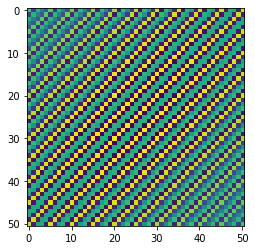

In [7]:
ksize = 50  
sigma = 30 
theta = 1*np.pi /4
lamda = 1*np.pi /16  
gamma=0.5  
phi = 0  

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

you can clearly visualize the wavelength change between these two images keeping everything else the same

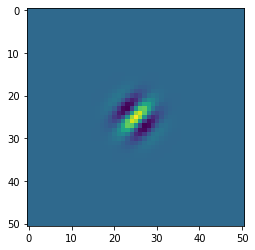

In [8]:
ksize = 50  
sigma = 3 
theta = 1*np.pi /4
lamda = 1*np.pi /4  
gamma=1  
phi = 0  

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

if we change `gamma` to 1 that means it's nothing but X^2 + Y^2 squared which defines a circle  so our aspect ratio reflects a circular kernel. 

If `gamma = 0.01` almost zero right so now we should have like a very elongated kernel.  

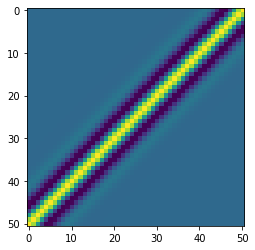

In [9]:
ksize = 50  
sigma = 3 
theta = 1*np.pi /4
lamda = 1*np.pi /4  
gamma=0.01  
phi = 0  

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

as you can see that's the aspect ratio so this is more circular this is more elongated.

Now what is the right value for any of these paraemters ? 

Well for the `ksize` the kernel size use a size that makes sense to the image and the feature size. If your features are smaller like down to like a couple of pixel level then having a 50 pixel sized kernel may you may overlook these
features.In fact when we generate features for our machine learning we are going to suite through this parameter space meaning; we're gonna create a filter Bank by changing the `Sigma`, `Thetha` `Lambda` `gamma` `phi`and `kernel size`.

Now which Sigma should you be using, again large Sigma on small features means you may miss these small features.

It completely depends on what you're trying to extract from your image and Gobel kernels are amazing for texture if you have two different regions with very similar gray level but you can see it but you cannot extract them separate
them you know using any of the other digital filters or your histogram try
Gabor filter this works like charm.

**In Gabor filter we actually create a digital filter effectively.** 

Lets apply this on an actual image and then see how it looks like.

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


ksize = 5  
sigma = 3 
theta = 1*np.pi /4
lamda = 1*np.pi /4  
gamma=0.01  
phi = 0  

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

img = cv2.imread('synthetic.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
kernel_resized = cv2.resize(kernel, (400, 400))       # Resize image

cv2.imshow('Kernel', kernel_resized)
cv2.imshow('Original Img.', img)
cv2.imshow('Filtered', fimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

Because our `theta` here is `np.pi/4` which is 45 degrees. We should only see the lines that are 45 degrees.

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


ksize = 5  
sigma = 3 
theta = 3*np.pi /4
lamda = 1*np.pi /4  
gamma=0.01  
phi = 0  

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

img = cv2.imread('synthetic.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
kernel_resized = cv2.resize(kernel, (400, 400))       # Resize image

cv2.imshow('Kernel', kernel_resized)
cv2.imshow('Original Img.', img)
cv2.imshow('Filtered', fimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

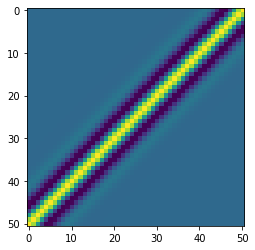

In [10]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt

# ksize = 5  
# sigma = 3 
# theta = 1*np.pi /4
# lamda = 1*np.pi /4  
# gamma=0.01  
# phi = 0  

# kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

# img = cv2.imread('BSE_Image.jpg')

# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)     #convert image to grayscale
# fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)   #applying Gabor Kernel

# kernel_resized = cv2.resize(kernel, (400, 400))       # Resize image

# cv2.imshow('Kernel', kernel_resized)
# cv2.imshow('Original Img.', img)
# cv2.imshow('Filtered', fimg)
# cv2.waitKey(5000)
# cv2.destroyAllWindows()